# Chebyshev method for Hiesenberg exchange model


In [1]:
from qutip import *
from scipy.special import jv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
si = qeye(2)

sx = sigmax()

sy = sigmay()

sz = sigmaz()

m =2

n =6

JJ = 1

AA = np.linspace(0,-0.10, n)

E1 = 1/2*sum(AA)+ 1/2*JJ

t = 2

tau = E1 * t / 2

kappa = 200

In [3]:
def spin_op(N):
    Sx = []
    Sy = []
    Sz = []

    for n in range(N):
        x_list = []
        y_list = []
        z_list = []

        for m in range(N):
            x_list.append(si)
            y_list.append(si)
            z_list.append(si)

        x_list[n] = sx
        y_list[n] = sy
        z_list[n] = sz

        Sx.append(tensor(x_list))
        Sy.append(tensor(y_list))
        Sz.append(tensor(z_list))

    return [Sx, Sy, Sz]

In [10]:
Sx,Sy,Sz=spin_op(m+n)
V = 0
HS = JJ * Sz[0]*Sz[1] + JJ * Sx[0]*Sx[1] + JJ * Sy[0]*Sy[1]
for i in range(2,n+m):
    V+=AA[i-2]*(Sz[0]+Sz[1])*Sz[i] + AA[i-2]*(Sy[0]+Sy[1])*Sy[i] + AA[i-2]*(Sx[0]+Sx[1])*Sx[i]

HH = V +HS

G = 2 * HH / E1
TG_list_HH=[1,G]
a = TG_list_HH[0]
b = TG_list_HH[1]
for i in range(1000):
    c = (2*G*b) - a
    a=b
    b=c
    TG_list_HH.append(b)


G = 2 * HS / E1
TG_list_HS=[1,G]
a = TG_list_HS[0]
b = TG_list_HS[1]
for i in range(1000):
    c = (2*G*b) - a
    a=b
    b=c
    TG_list_HS.append(b)
def evo(HHI, E1, kappa, tau):
    if HHI == HH:
        TG_list = TG_list_HH
    else:
        TG_list = TG_list_HS
    UU = 0
    for k in range(int(kappa) + 1):
        a = 2
        if k == 0:
            a = 1
        UU += a * ((-1j) ** k) * jv(k,tau) * TG_list[k]
    return UU

In [11]:
chi = [0.08356355+0.j,
 0.67701534+0.j,
 0.02089637+0.j,
 0.41727234+0.j,
 0.10026068+0.j,
 0.2631915+0.j,
 0.11728196+0.j,
 0.07584105+0.j,
 0.03271168+0.j,
 0.24643829+0.j,
 0.11764314+0.j,
 0.05264788+0.j,
 0.04851719+0.j,
 0.12573713+0.j,
 0.03044563+0.j,
 0.16145049+0.j,
 0.04408234+0.j,
 0.10808431+0.j,
 0.03104406+0.j,
 0.10781597+0.j,
 0.01670552+0.j,
 0.07753717+0.j,
 0.059437+0.j,
 0.03167078+0.j,
 0.06989142+0.j,
 0.05609559+0.j,
 0.08632898+0.j,
 0.0002581+0.j,
 0.06851967+0.j,
 0.0492174+0.j,
 0.02145611+0.j,
 0.02705295+0.j,
 0.02458859+0.j,
 0.01179073+0.j,
 0.00734239+0.j,
 0.00358787+0.j,
 0.04033101+0.j,
 0.00083553+0.j,
 0.03600686+0.j,
 0.00199896+0.j,
 0.0146233+0.j,
 0.01087063+0.j,
 0.06138736+0.j,
 0.06872809+0.j,
 0.0327305+0.j,
 0.00591281+0.j,
 0.02085083+0.j,
 0.03771475+0.j,
 0.03370585+0.j,
 0.04409669+0.j,
 0.0200874+0.j,
 0.0143346+0.j,
 0.02515605+0.j,
 0.00980834+0.j,
 0.01689861+0.j,
 0.00887154+0.j,
 0.00309636+0.j,
 0.0495633+0.j,
 0.03160314+0.j,
 0.00513367+0.j,
 0.03694167+0.j,
 0.02764387+0.j,
 0.03499216+0.j,
 0.22299754+0.j]

In [12]:
zero = basis(2) 
c = create(2)
one=c*zero
chi = Qobj(np.array(chi))
psi_init = tensor(zero,one)
psi0=tensor(psi_init, chi)
ssz = 1/2.0 * sigmaz()
ssx=1/2.0*sigmax()
ssy=1/2.0*sigmay()

In [13]:
qz=[ssz]
for i in range(7):
    qz.append(qeye(2))
qz = tensor(qz)
qz = Qobj(qz.data)
qx=[ssx]
for i in range(7):
    qx.append(qeye(2))
qx = tensor(qx)
qx = Qobj(qx.data)
qy=[ssy]
for i in range(7):
    qy.append(qeye(2))
qy = tensor(qy)
qy = Qobj(qy.data)

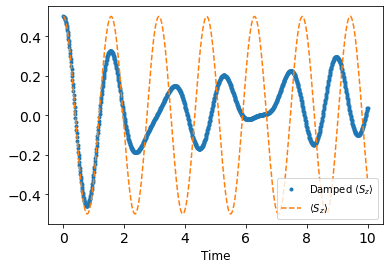

In [14]:
expect_ops = [HH,HS]
labelss=['x','y']
stylee ={'x':'.', 'y':'--',}
for ops,l in zip(expect_ops,labelss):
    result = {}
    for i in np.linspace(0,10,1000):
        ttau = E1 * i /2
        uu = evo(ops,E1,kappa,ttau)
        psi = Qobj(uu.data * psi0.data)
        out = psi.dag()*qz*psi
        result[i] = (out[0][0][0].real)
    plt.plot(list(result.keys()), list(result.values()),stylee[l],label=f"Damped $\langle S_z \\rangle $" if l=='x' else f"$\langle S_z \\rangle $"  )
plt.legend()
plt.xlabel("Time",fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Compared with Qutip


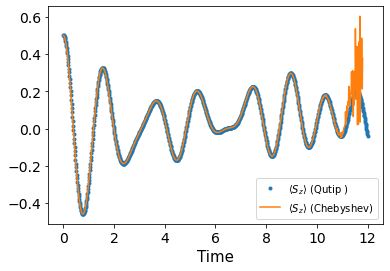

In [16]:
t = np.linspace(0,12,1000)
expect_ops = [qz]
result = sesolve(HH, psi0, t, expect_ops)
labels = ['z']
style = {'z':'.'}
for r,l in zip(result.expect,labels):
    plt.plot(t, r, style[l],
        label="$\langle S_%c \\rangle $ (Qutip )" % l)

result = {}
for i in np.linspace(0,11.8,1000):
    ttau = E1 * i /2
    uu = evo(HH,E1,kappa,ttau)
    psi = Qobj(uu.data * psi0.data)
    out = psi.dag()*qz*psi
    result[i] = (out[0][0][0].real)
plt.plot(list(result.keys()), list(result.values()),
        label="$\langle S_%c \\rangle $ (Chebyshev)" % l )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Time", size=15)
plt.legend(fontsize=10)
plt.show()